<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Step_by_step_CNN_on_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load dataset
(train_x, train_y),(test_x, test_y)=mnist.load_data()
print('Train_x: ',train_x.shape,'\n','Train_y: ',train_y.shape)
print('Test_x: ',test_x.shape,'\n','Test_y: ',test_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train_x:  (60000, 28, 28) 
 Train_y:  (60000,)
Test_x:  (10000, 28, 28) 
 Test_y:  (10000,)


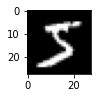

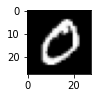

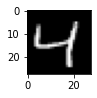

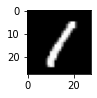

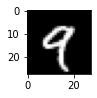

In [ ]:
for i in range(5):
  plt.subplot(330+1+i)
  plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [ ]:
from keras.utils import to_categorical
train_x=train_x.reshape(train_x.shape[0],28,28,1)
test_x=test_x.reshape(test_x.shape[0],28,28,1)
train_y=to_categorical(train_y)
test_y=to_categorical(test_y)

In [ ]:
train_x=train_x.astype('float32')/255.0
test_x=test_x.astype('float32')/255.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
optimum= SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimum, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [ ]:
history=model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y),verbose=0)

In [ ]:
acc=model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.9920


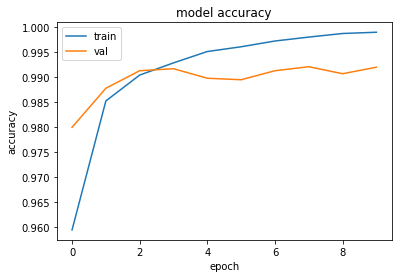

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

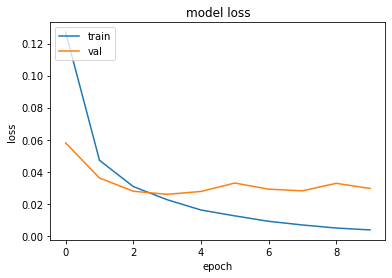

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

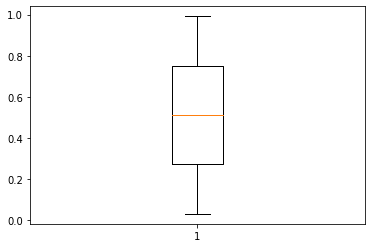

In [ ]:
plt.boxplot(acc)
plt.show()

/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


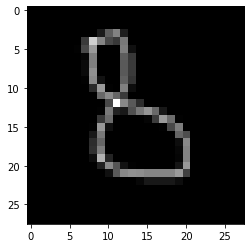

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from numpy import argmax
filename='/content/drive/MyDrive/Datasets/Digits/8_.PNG'
img = load_img(filename, grayscale=True, target_size=(28, 28), interpolation='bicubic')
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')/255.0

In [ ]:
prediction=model.predict(img)
digit = argmax(prediction)
print(digit)

1/1 [==============================] - 0s 131ms/step
5


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from numpy import argmax
import os
directory = '/content/drive/MyDrive/Datasets/Digits/'
for filename in os.listdir(directory):
    if filename.endswith('.PNG'):
        img = load_img(os.path.join(directory, filename), grayscale=True, target_size=(28, 28),interpolation='bicubic')
        img = img_to_array(img)
        img = img.reshape(1, 28, 28, 1)
        img = img.astype('float32')/255.0 
        prediction = model.predict(img)
        digit = argmax(prediction)
        print(f"Filename: {filename}, Predicted digit: {digit}")


1/1 [==============================] - 0s 21ms/step
Filename: 0.PNG, Predicted digit: 0
1/1 [==============================] - 0s 21ms/step
Filename: 1.PNG, Predicted digit: 1
1/1 [==============================] - 0s 21ms/step
Filename: 3.PNG, Predicted digit: 3
1/1 [==============================] - 0s 22ms/step
Filename: 5.PNG, Predicted digit: 5
1/1 [==============================] - 0s 20ms/step
Filename: 4.PNG, Predicted digit: 4
1/1 [==============================] - 0s 19ms/step
Filename: 2.PNG, Predicted digit: 2
1/1 [==============================] - 0s 23ms/step
Filename: 7.PNG, Predicted digit: 1
1/1 [==============================] - 0s 21ms/step
Filename: 9.PNG, Predicted digit: 9
1/1 [==============================] - 0s 18ms/step
Filename: 8.PNG, Predicted digit: 8
1/1 [==============================] - 0s 18ms/step
Filename: 99.PNG, Predicted digit: 9
1/1 [==============================] - 0s 19ms/step
Filename: 6.PNG, Predicted digit: 6
1/1 [==========================

In [ ]:
model.save_weights('/content/drive/MyDrive/Datasets/CCN_mnist_dataset.h5')
